In [168]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["cmr10", "cmsy10"]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.grid"] = True


import Qubits

kB = sc.constants.Boltzmann
hbar = sc.constants.hbar
h = sc.constants.h


EC = 1
EJ = 40
gap = 40
T = 0.01
ng = 0

In [169]:
transmonC = Qubits.transmon_charge(20, EC, EJ, ng)#Values given in Ghz*hbar
transmonC.verbose = True

transmonC.solve()

gamma_arr = transmonC.T_1_gamma()
print(str(gamma_arr))

print(str(1/(gamma_arr))+"ns" )
#"μs"
print(str(1/np.sum(gamma_arr)))

Charge matrix element: 1.0507295460492738
Qubit energies: -31.313390070336403 and -14.491063255980613
Qubit frequency: 16.82232681435579
[3.94534148e-07 3.01900211e-04]
[2534634.85034265    3312.35276466]ns
3308.0297114377295


In [170]:
transmonF = Qubits.transmon_flux(200, EC, EJ, ng)#Values given in Ghz
transmonF.verbose = True

transmonF.solve()

gamma_arr_flux = transmonF.T_1_gamma()
print(gamma_arr_flux)

print(1/gamma_arr_flux)
print(1/np.sum(gamma_arr_flux)*1e3)

Charge matrix element: 1.0548529123730546
Qubit energies: -31.272212007841347 and -14.375167985228725
Qubit frequency: 16.897044022612622
[3.94330973e-07 3.04431122e-04]
[2535940.79377428    3284.81527457]
3280565.943063561


In [171]:
gatemonBeenakker = Qubits.gatemon_flux(200, EC, EJ, T, ng)
gatemonBeenakker.beenakker = True
gatemonBeenakker.verbose = True
gatemonBeenakker.solve()

gamma_gatemonBeenakker = gatemonBeenakker.T_1_gamma()

print(gamma_gatemonBeenakker)

print(1/gamma_gatemonBeenakker)
print(1/np.sum(gamma_gatemonBeenakker)*1e3)

Charge matrix element: 0.0006048194179895269
Qubit energies: -39.90057247587345 and -35.89971240914485
Qubit frequency: 4.000860066728606
[9.54887226e-10 4.13300085e-08]
[1.04724409e+09 2.41954947e+07]
23649106453.793407


In [172]:
gatemonF = Qubits.gatemon_flux(200, EC, EJ, T, ng)
gatemonF.verbose = True
gatemonF.solve()

gamma_gatemonF = gatemonF.T_1_gamma()

print(gamma_gatemonF)

print(1/gamma_gatemonF)
print(1/np.sum(gamma_gatemonF)*1e3)

Charge matrix element: 0.13865781209233252
Qubit energies: -38.870628288168774 and -36.06817173351184
Qubit frequency: 2.802456554656935
[3.12525295e-07 6.63696670e-06]
[3199740.999751    150671.23971147]
143895410.09599507


In [173]:
gatemonC = Qubits.gatemon_charge(50, EC, EJ, T, ng)
gatemonC.verbose = True
gatemonC.solve()

gamma_gatemonC = gatemonC.T_1_gamma()

print(gamma_gatemonC)

print(1/gamma_gatemonC)
print(1/np.sum(gamma_gatemonC)*1e3)

Charge matrix element: 0.13758247199963425
Qubit energies: -38.87483264026923 and -36.06451430787037
Qubit frequency: 2.8103183323988645
[3.09234052e-07 6.60396908e-06]
[3233796.51528179  151424.08868227]
144650747.35071388


## Plots

In [174]:
T_arr = np.linspace(0.001, 0.999, 100)
beta_arr = np.linspace(5, 100, 100)
N_flux = 150
N_charge = 30

transmonPlot = Qubits.transmon_charge(N_charge, EC, EJ, 0)
BeenakkerPlot = Qubits.gatemon_flux(N_flux, EC, EJ, 0.1, 0)
BeenakkerPlot.beenakker = True
AverinPlot = Qubits.gatemon_charge(N_charge, EC, EJ, 0.1, 0)


#### As a function of T

In [175]:
four_beta = np.array([1, 10, 50 , 100])

T_result_transmon = np.zeros((len(four_beta), len(T_arr), 2))
T_result_beenaker = np.zeros((len(four_beta), len(T_arr), 2))
T_result_Averin = np.zeros((len(four_beta), len(T_arr), 2))

transmonPlot.EJ = gap*1/4
BeenakkerPlot.gap = gap
AverinPlot.gap = gap

for i in range(len(four_beta)):

    BeenakkerPlot.EC = gap/four_beta[i]
    AverinPlot.EC = gap/four_beta[i]

    for j in range(len(T_arr)):

        transmonPlot.EC = (gap*T_arr[j]/4)/four_beta[i]
        transmonPlot.EJ= gap*T_arr[j]/4

        BeenakkerPlot.T = T_arr[j]
        AverinPlot.T = T_arr[j]

        transmonPlot.solve()
        BeenakkerPlot.solve()
        AverinPlot.solve()

        transmonGamma = transmonPlot.T_1_gamma()
        beenakkerGamma =  BeenakkerPlot.T_1_gamma()
        averinGamma =  AverinPlot.T_1_gamma()

        T_result_transmon[i, j, :] = 1/transmonGamma
        T_result_beenaker[i, j, :] = 1/beenakkerGamma
        T_result_Averin[i, j, :] = 1/averinGamma
        
        

The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.
Blue is the transmon, green is Beenakker and orange is Averin


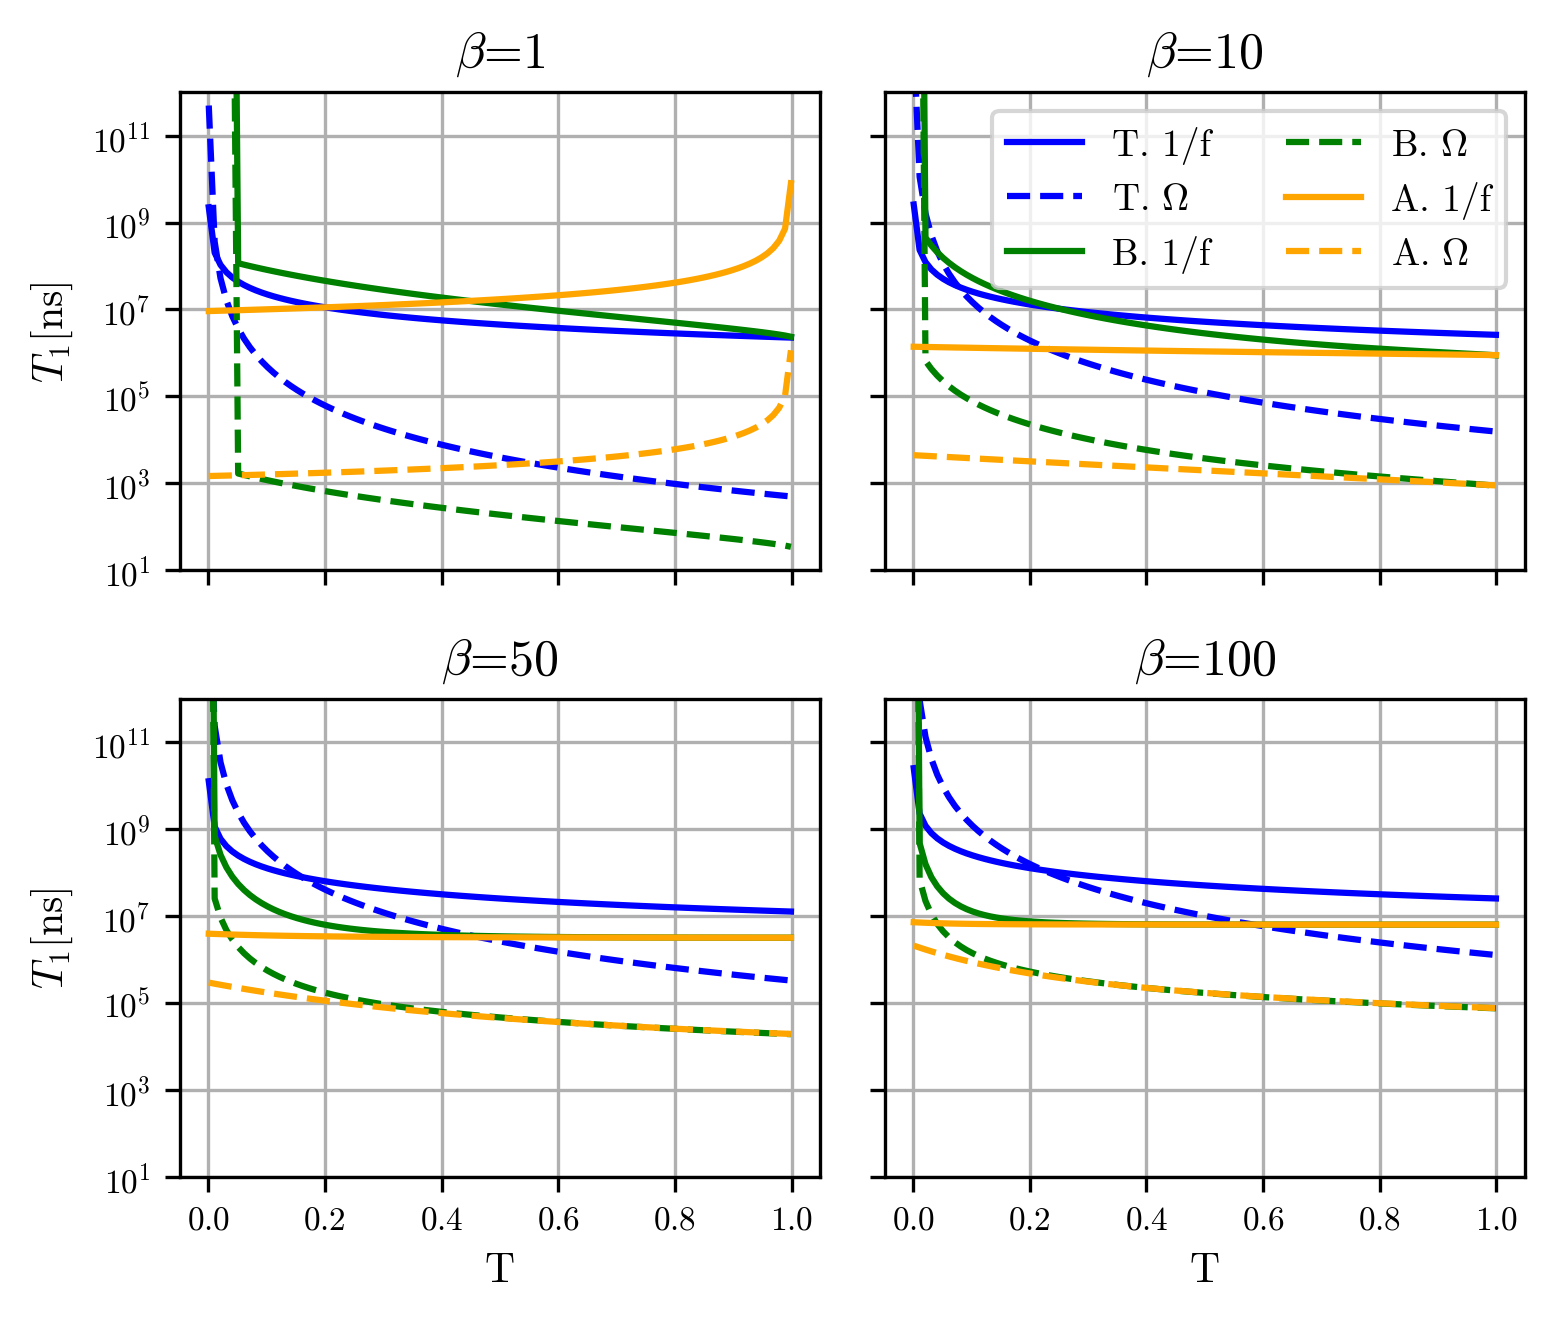

In [176]:
fig_beta, ax_beta = plt.subplots(2,2, figsize=(5.3, 4.5), sharex=True, sharey=True)

print("The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.")
print("Blue is the transmon, green is Beenakker and orange is Averin")

for m in range(2):
    for n in range(2):
        beta = four_beta[n + m*2]

        #The three T1 times for the transmon
        ax_beta[m, n].plot(T_arr, T_result_transmon[n + m*2, :, 0], color = "blue", label = "T. 1/f")
        ax_beta[m, n].plot(T_arr, T_result_transmon[n + m*2, :, 1], linestyle = '--', color = "blue", label = r"T. $\Omega$")

        #The three T1 times for Beenakker model
        ax_beta[m, n].plot(T_arr, T_result_beenaker[n + m*2, :, 0], color = "green", label = "B. 1/f")
        ax_beta[m, n].plot(T_arr, T_result_beenaker[n + m*2, :, 1], "--", color = "green", label = r"B. $\Omega$")

        #The three T1 times for Averin
        ax_beta[m, n].plot(T_arr, T_result_Averin[n + m*2, :, 0], color = "orange", label = "A. 1/f")
        ax_beta[m, n].plot(T_arr, T_result_Averin[n + m*2, :, 1], "--", color = "orange", label = r"A. $\Omega$")


        ax_beta[m, n].set(title = r"$\beta$="+str(four_beta[n + m*2]), yscale = "log", ylim=(1e1, 1e12))
        #ax_beta[m, n].grid()

ax_beta[0,1].legend(ncol=2, loc = "upper right")
ax_beta[0,0].set(ylabel = r"$T_1$[ns]")
ax_beta[1,1].set(xlabel = r"T")
ax_beta[1,0].set(xlabel = r"T", ylabel = r"$T_1$[ns]")

#fig_beta.suptitle(r"Plots of the $T_1$ times from $n_g$ noise with $\Delta=40GHz\cdot h$ and $E_J=\Delta T/4$")
fig_beta.tight_layout()

In [177]:
four_T = np.array([0.01, 0.1, 0.5, 1])

energy_result_transmon = np.zeros((len(beta_arr), 2))
energy_result_beenakker = np.zeros((len(four_T), len(beta_arr), 2))
energy_result_Averin = np.zeros((len(four_T), len(beta_arr), 2))

for i in range(len(four_T)):
    BeenakkerPlot.T = four_T[i]
    AverinPlot.T = four_T[i]

    for j in range(len(beta_arr)):

        transmonPlot.EC = (gap*four_T[i]/4)/beta_arr[j]
        transmonPlot.EJ= gap*four_T[i]/4
        
        BeenakkerPlot.EC = gap/beta_arr[j]
        AverinPlot.EC = gap/beta_arr[j]

        BeenakkerPlot.solve()
        AverinPlot.solve()

        beenakkerGamma =  BeenakkerPlot.T_1_gamma()
        averinGamma =  AverinPlot.T_1_gamma()

        energy_result_beenakker[i, j, :] = 1/beenakkerGamma
        energy_result_Averin[i, j, :] = 1/averinGamma
        
        if(i == 0):
            transmonPlot.EC = 1/beta_arr[j]
            transmonPlot.solve()

            transmonGamma = transmonPlot.T_1_gamma()
            energy_result_transmon[j,:] = 1/transmonGamma


The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.
Blue is the transmon, green is Beenakker and orange is Averin


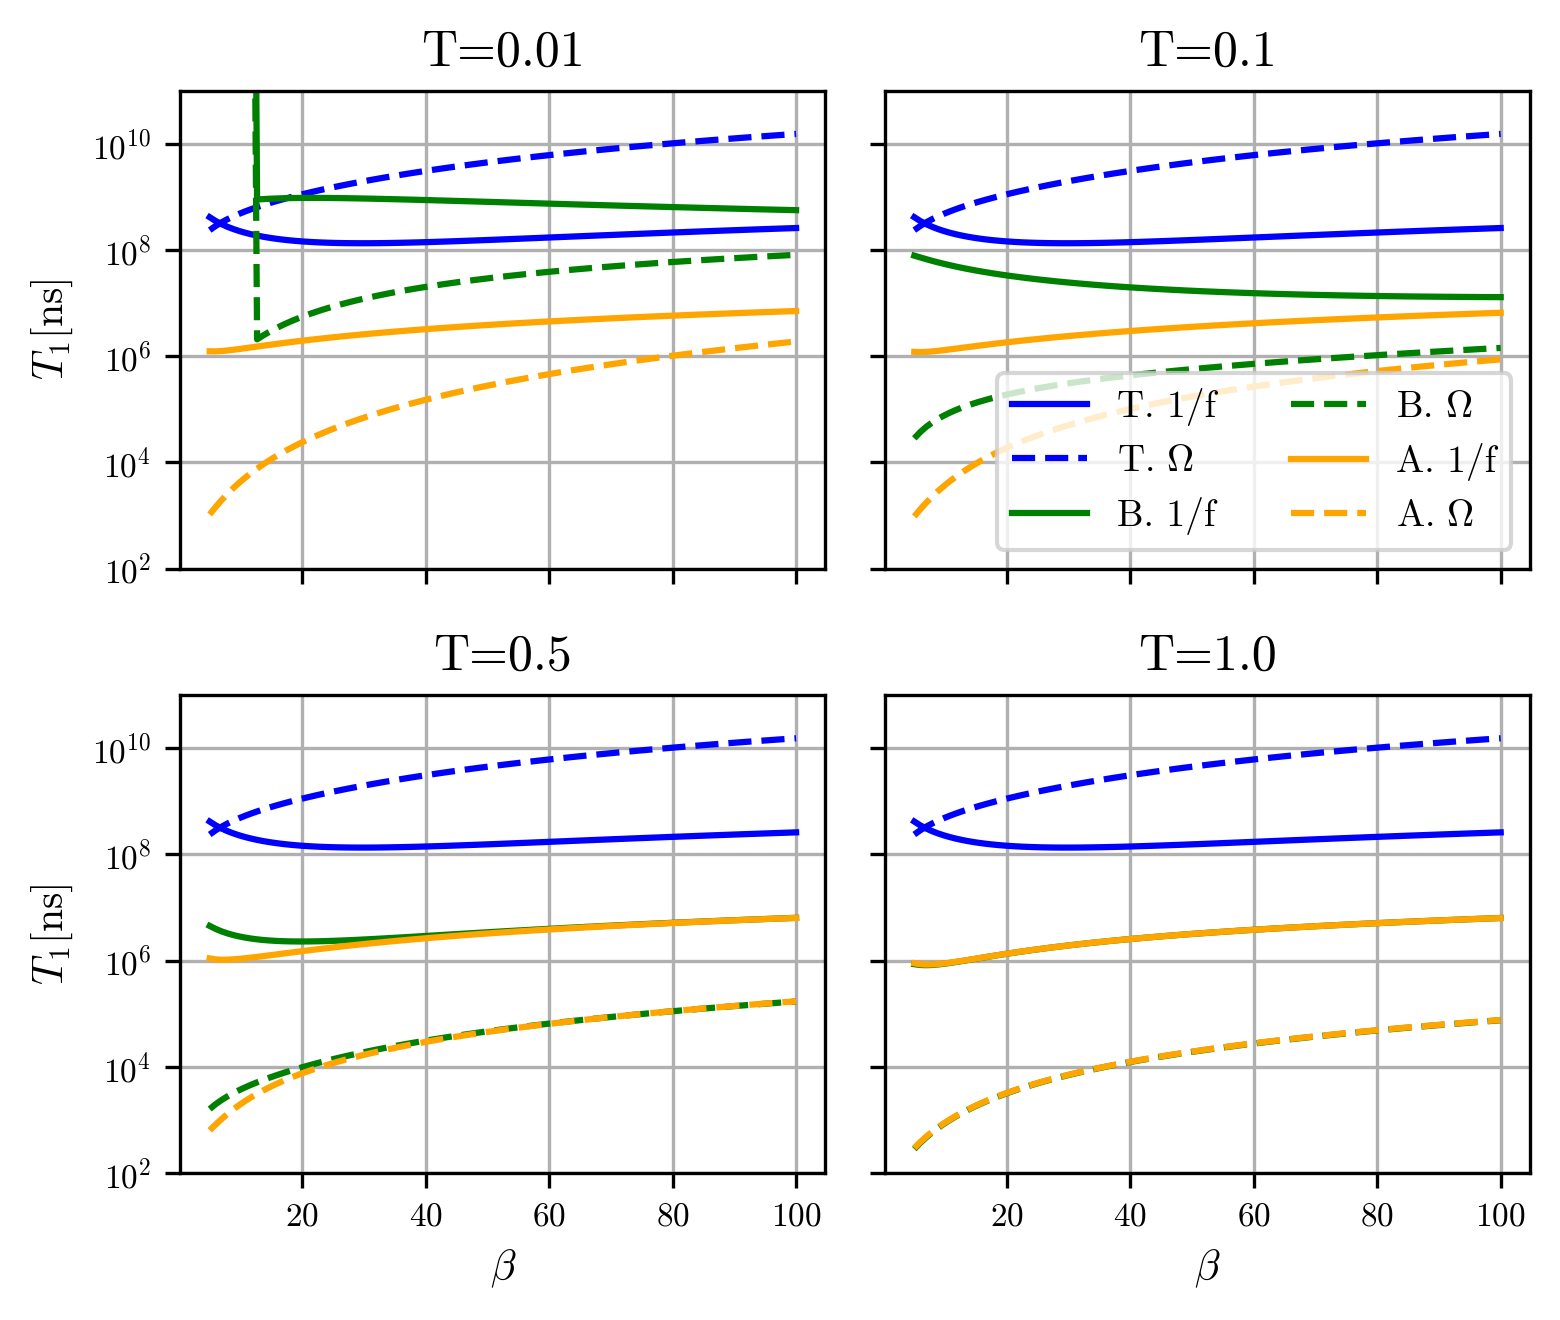

In [178]:
fig_T, ax_T = plt.subplots(2,2, figsize=(5.3, 4.5), sharex=True, sharey=True)

print("The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.")
print("Blue is the transmon, green is Beenakker and orange is Averin")

for m in range(2):
    for n in range(2):
        #T = four_T[n + m*2]

        #The three T1 times for the transmon
        ax_T[m, n].plot(beta_arr, energy_result_transmon[:, 0], color = "blue", label = "T. 1/f")
        ax_T[m, n].plot(beta_arr, energy_result_transmon[:, 1], linestyle = '--', color = "blue", label = r"T. $\Omega$")

        #The three T1 times for Beenakker model
        ax_T[m, n].plot(beta_arr, energy_result_beenakker[n + m*2, :, 0], color = "green", label = "B. 1/f")
        ax_T[m, n].plot(beta_arr, energy_result_beenakker[n + m*2, :, 1], "--", color = "green", label = r"B. $\Omega$")

        #The three T1 times for Averin
        ax_T[m, n].plot(beta_arr, energy_result_Averin[n + m*2, :, 0], color = "orange", label = "A. 1/f")
        ax_T[m, n].plot(beta_arr, energy_result_Averin[n + m*2, :, 1], "--", color = "orange", label = r"A. $\Omega$")


        ax_T[m, n].set(title = r"T="+str(four_T[n + m*2]), yscale = "log", ylim = (1e2, 1e11))

ax_T[0,1].legend(ncol = 2)
ax_T[0,0].set(ylabel = r"$T_1$[ns]")
ax_T[1,1].set(xlabel = r"$\beta$")
ax_T[1,0].set(xlabel = r"$\beta$", ylabel = r"$T_1$[ns]")

#fig_T.suptitle(r"Plots of the $T_1$ times from $n_g$ noise with $\Delta=E_J=1$")
fig_T.tight_layout()

In [179]:
energy_arr = np.linspace(5, 300, 200)

T_energy_plot = 0.1
AverinPlot.T = T_energy_plot
BeenakkerPlot.T = T_energy_plot

energy_result_transmon = np.zeros((len(four_beta), len(energy_arr), 2))
transmon_frequencies = np.zeros_like(energy_arr)
energy_result_beenakker = np.zeros((len(four_beta), len(energy_arr), 2))
beenakker_frequencies = np.zeros_like(energy_arr)
energy_result_Averin = np.zeros((len(four_beta), len(energy_arr), 2))
averin_frequencies = np.zeros_like(energy_arr)


for i in range(len(four_beta)):

    for j in range(len(energy_arr)):
        transmonPlot.EC = energy_arr[j]/four_beta[i]
        transmonPlot.EJ = energy_arr[j]
        BeenakkerPlot.EC = energy_arr[j]/four_beta[i]
        BeenakkerPlot.gap = energy_arr[j]
        AverinPlot.EC = energy_arr[j]/four_beta[i]
        AverinPlot.gap = energy_arr[j]

        transmonPlot.solve()
        BeenakkerPlot.solve()
        AverinPlot.solve()

        transmonGamma = transmonPlot.T_1_gamma()
        beenakkerGamma =  BeenakkerPlot.T_1_gamma()
        averinGamma =  AverinPlot.T_1_gamma()

        energy_result_transmon[i, j, :] = 1/transmonGamma
        energy_result_beenakker[i, j, :] = 1/beenakkerGamma
        energy_result_Averin[i, j, :] = 1/averinGamma

        transmon_frequencies[j] = transmonPlot.eigvals[1] - transmonPlot.eigvals[0]
        beenakker_frequencies[j] = BeenakkerPlot.eigvals[1] - BeenakkerPlot.eigvals[0]
        averin_frequencies[j] = AverinPlot.eigvals[1] - AverinPlot.eigvals[0]
        
        

The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.
Blue is the transmon, green is Beenakker and orange is Averin


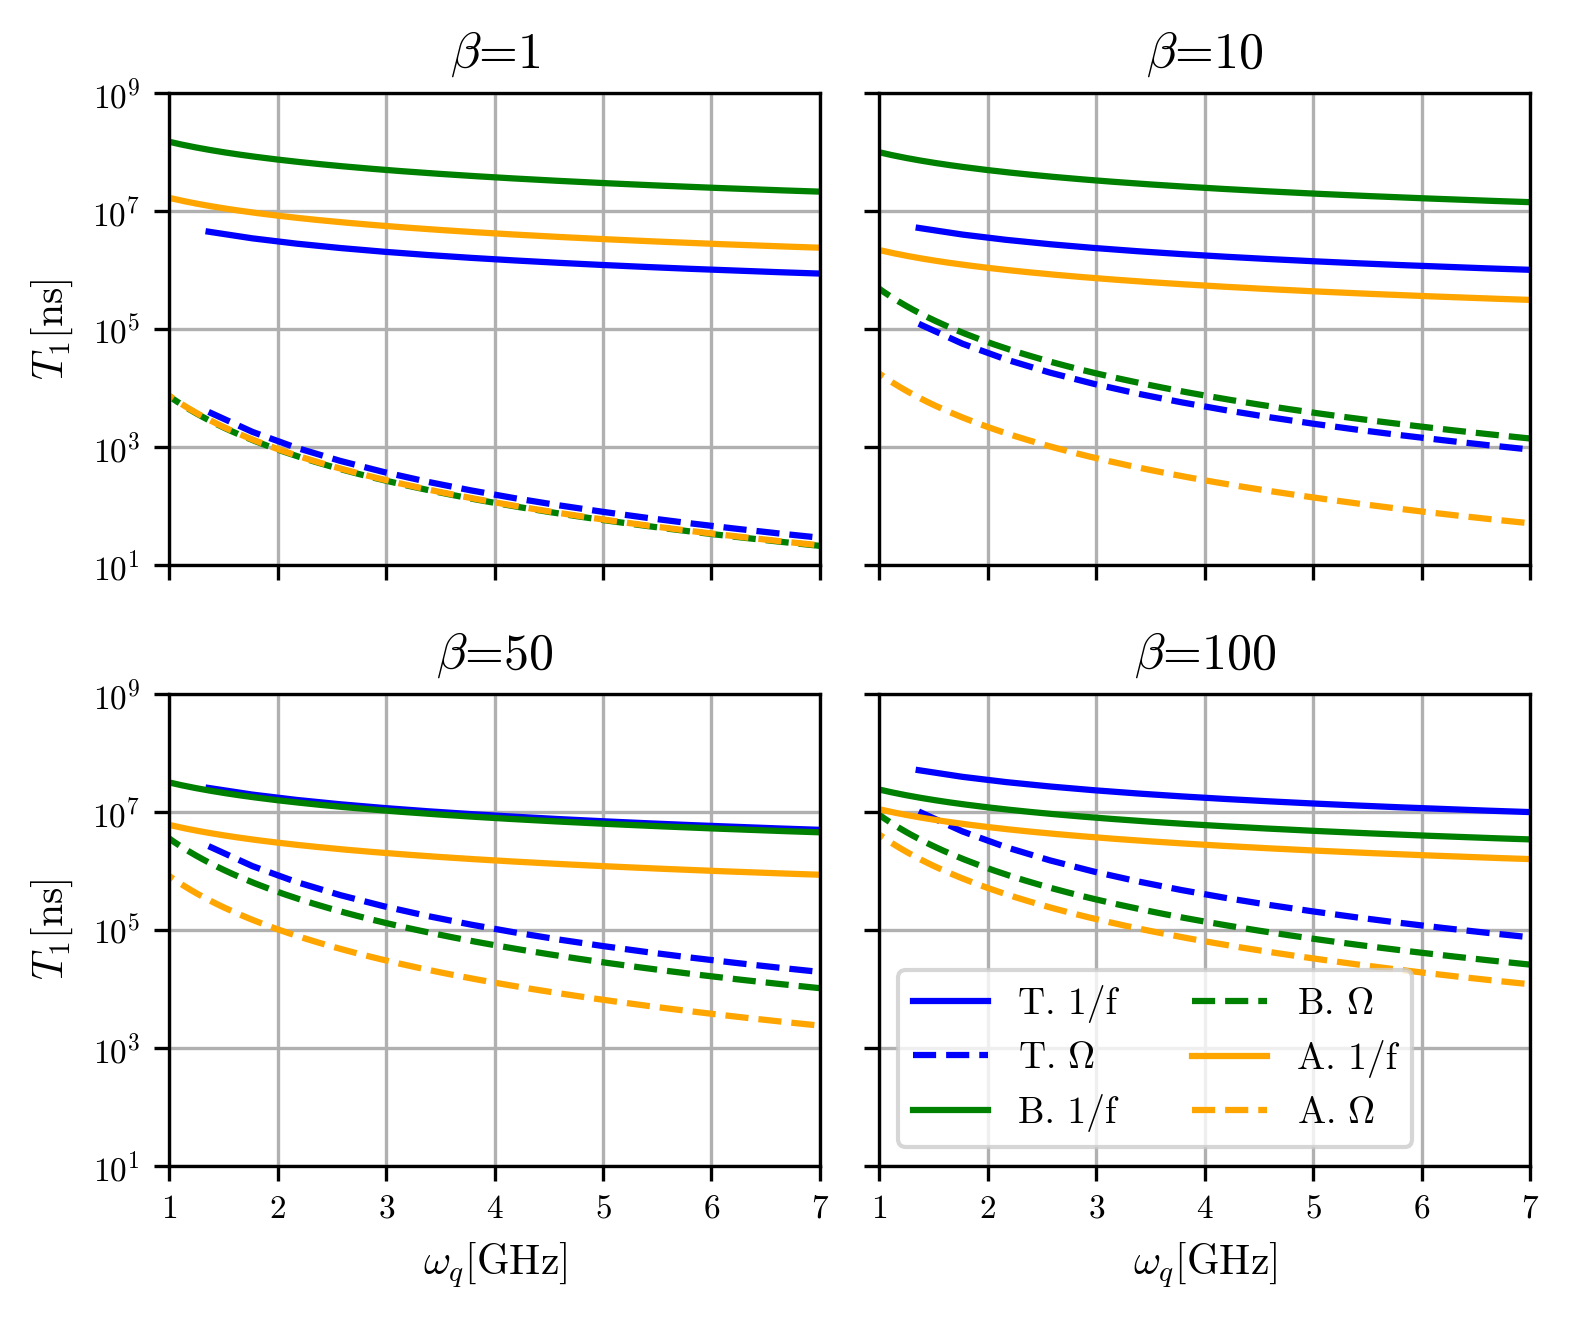

In [180]:
fig_energy, ax_energy = plt.subplots(2,2, figsize=(5.3, 4.5), sharex=True, sharey=True)

print("The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.")
print("Blue is the transmon, green is Beenakker and orange is Averin")

for m in range(2):
    for n in range(2):
        beta = four_beta[n + m*2]

        #The three T1 times for the transmon
        ax_energy[m, n].plot(transmon_frequencies, energy_result_transmon[n + m*2, :, 0], color = "blue", label = "T. 1/f")
        ax_energy[m, n].plot(transmon_frequencies, energy_result_transmon[n + m*2, :, 1], '--', color = "blue", label = r"T. $\Omega$")

        #The three T1 times for Beenakker model
        ax_energy[m, n].plot(beenakker_frequencies, energy_result_beenakker[n + m*2, :, 0], color = "green", label = "B. 1/f")
        ax_energy[m, n].plot(beenakker_frequencies, energy_result_beenakker[n + m*2, :, 1], "--", color = "green", label = r"B. $\Omega$")

        #The three T1 times for Averin
        ax_energy[m, n].plot(averin_frequencies, energy_result_Averin[n + m*2, :, 0], color = "orange", label = "A. 1/f")
        ax_energy[m, n].plot(averin_frequencies, energy_result_Averin[n + m*2, :, 1], "--", color = "orange", label = r"A. $\Omega$")


        ax_energy[m, n].set(title = r"$\beta$="+str(four_beta[n + m*2]), yscale = "log", xlim=(1,7), ylim=(1e1, 1e9))

ax_energy[1,1].legend(ncol = 2)
ax_energy[0,0].set(ylabel = r"$T_1$[ns]")
ax_energy[1,1].set(xlabel = r"$\omega_q$[GHz]")
ax_energy[1,0].set(xlabel = r"$\omega_q$[GHz]", ylabel = r"$T_1$[ns]")

#fig_energy.suptitle(r"Plots of the $T_1$ times from $n_g$ noise with $\beta$ constant and T="+str(T_energy_plot))
fig_energy.tight_layout()

In [181]:
ng_arr = np.linspace(-0.99,0.99,200)
gamma_dephase_transmon = np.zeros_like(ng_arr)
gamma_dephase_beenakker = np.zeros_like(ng_arr)
gamma_dephase_averin = np.zeros_like(ng_arr)

transmonPlot.EJ = gap*0.1/4
transmonPlot.EC = 0.2

BeenakkerPlot.gap = gap
BeenakkerPlot.EC = 0.2
BeenakkerPlot.T = 0.1

AverinPlot.gap = gap
AverinPlot.EC = 0.2
AverinPlot.T = 0.1

for i in range(len(ng_arr)):
    transmonPlot.ng = ng_arr[i]
    transmonPlot.solve()
    gamma_dephase_transmon[i] = transmonPlot.dephasing_rate_ng()

    BeenakkerPlot.ng = ng_arr[i]
    BeenakkerPlot.solve()
    gamma_dephase_beenakker[i] = BeenakkerPlot.dephasing_rate_ng()

    AverinPlot.ng = ng_arr[i]
    AverinPlot.solve()
    gamma_dephase_averin[i] = AverinPlot.dephasing_rate_ng()



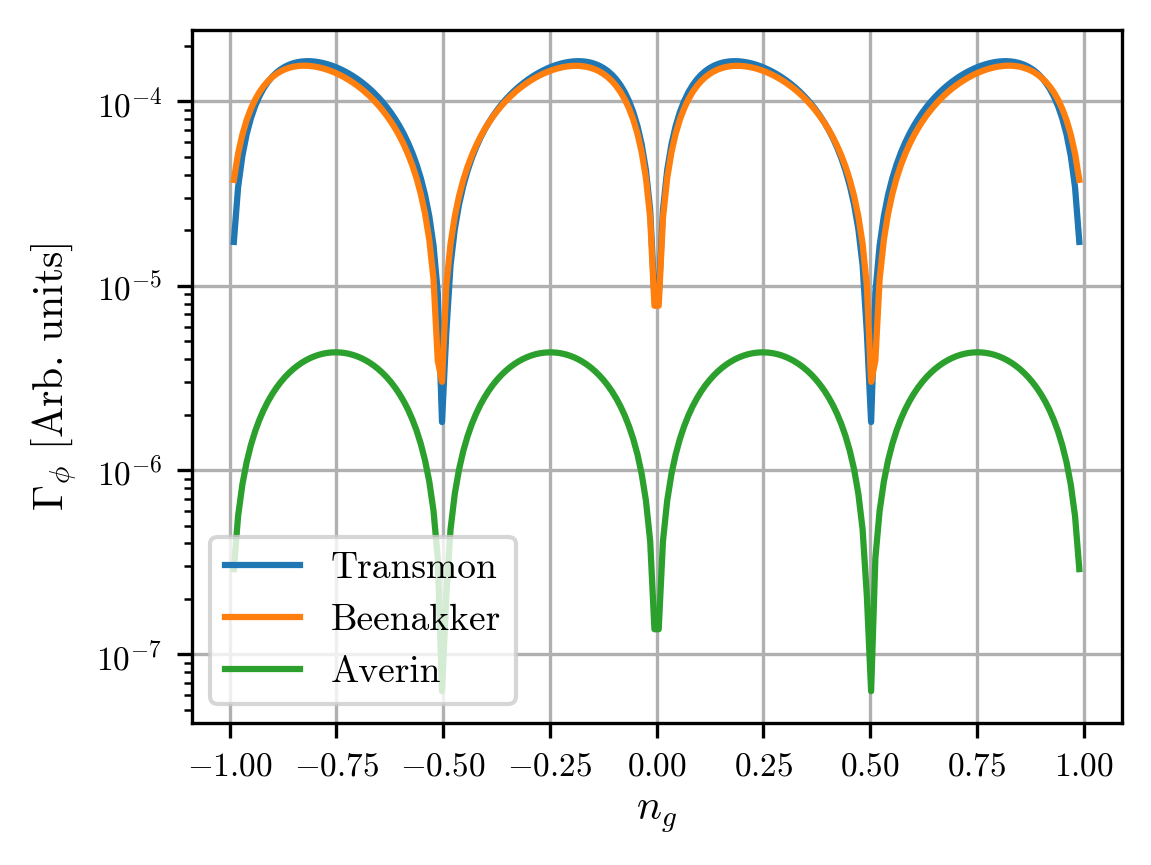

In [182]:
plt.plot(ng_arr, gamma_dephase_transmon, label = "Transmon")
plt.plot(ng_arr, gamma_dephase_beenakker, label = "Beenakker")
plt.plot(ng_arr, gamma_dephase_averin, label = "Averin")
plt.xlabel(r"$n_g$")
plt.ylabel(r"$\Gamma_\phi$ [Arb. units]")
plt.yscale("log")
plt.legend()

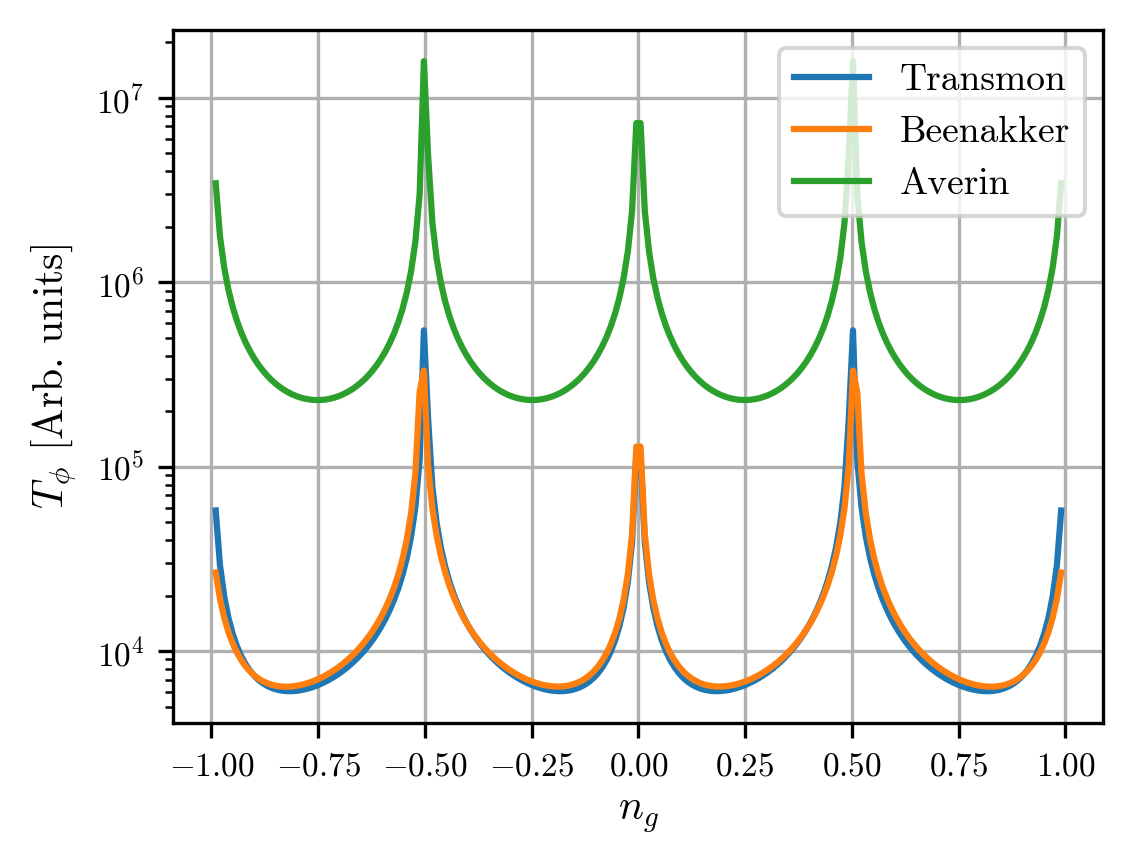

In [183]:
plt.plot(ng_arr, 1/gamma_dephase_transmon, label = "Transmon")
plt.plot(ng_arr, 1/gamma_dephase_beenakker, label = "Beenakker")
plt.plot(ng_arr, 1/gamma_dephase_averin, label = "Averin")
plt.xlabel(r"$n_g$")
plt.ylabel(r"$T_\phi$ [Arb. units]")
plt.yscale('log')
plt.legend()

## T Noise

In [184]:
four_T = np.array([0.01, 0.1, 0.5, 0.999])

beta_arr = np.linspace(5, 200, 150)

energy_result_beenakker_T = np.zeros((len(four_T), len(beta_arr), 2))
energy_result_Averin_T = np.zeros((len(four_T), len(beta_arr), 2))

Averin_flux = Qubits.gatemon_flux(100, 1, 1, 0, 0)
Averin_flux.beenakker = False

BeenakkerPlot.gap = 1
Averin_flux.gap = 1

BeenakkerPlot.ng = 0
Averin_flux.ng = 0

for i in range(len(four_T)):
    BeenakkerPlot.T = four_T[i]
    Averin_flux.T = four_T[i]

    for j in range(len(beta_arr)):
        BeenakkerPlot.EC = 1/beta_arr[j]
        Averin_flux.EC = 1/beta_arr[j]

        BeenakkerPlot.solve()
        Averin_flux.solve()

        beenakkerGamma =  BeenakkerPlot.T_1_gamma_T()
        averinGamma =  Averin_flux.T_1_gamma_T()

        energy_result_beenakker_T[i, j, :] = 1/beenakkerGamma
        energy_result_Averin_T[i, j, :] = 1/averinGamma
        


The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.
Blue is the transmon, green is Beenakker and orange is Averin


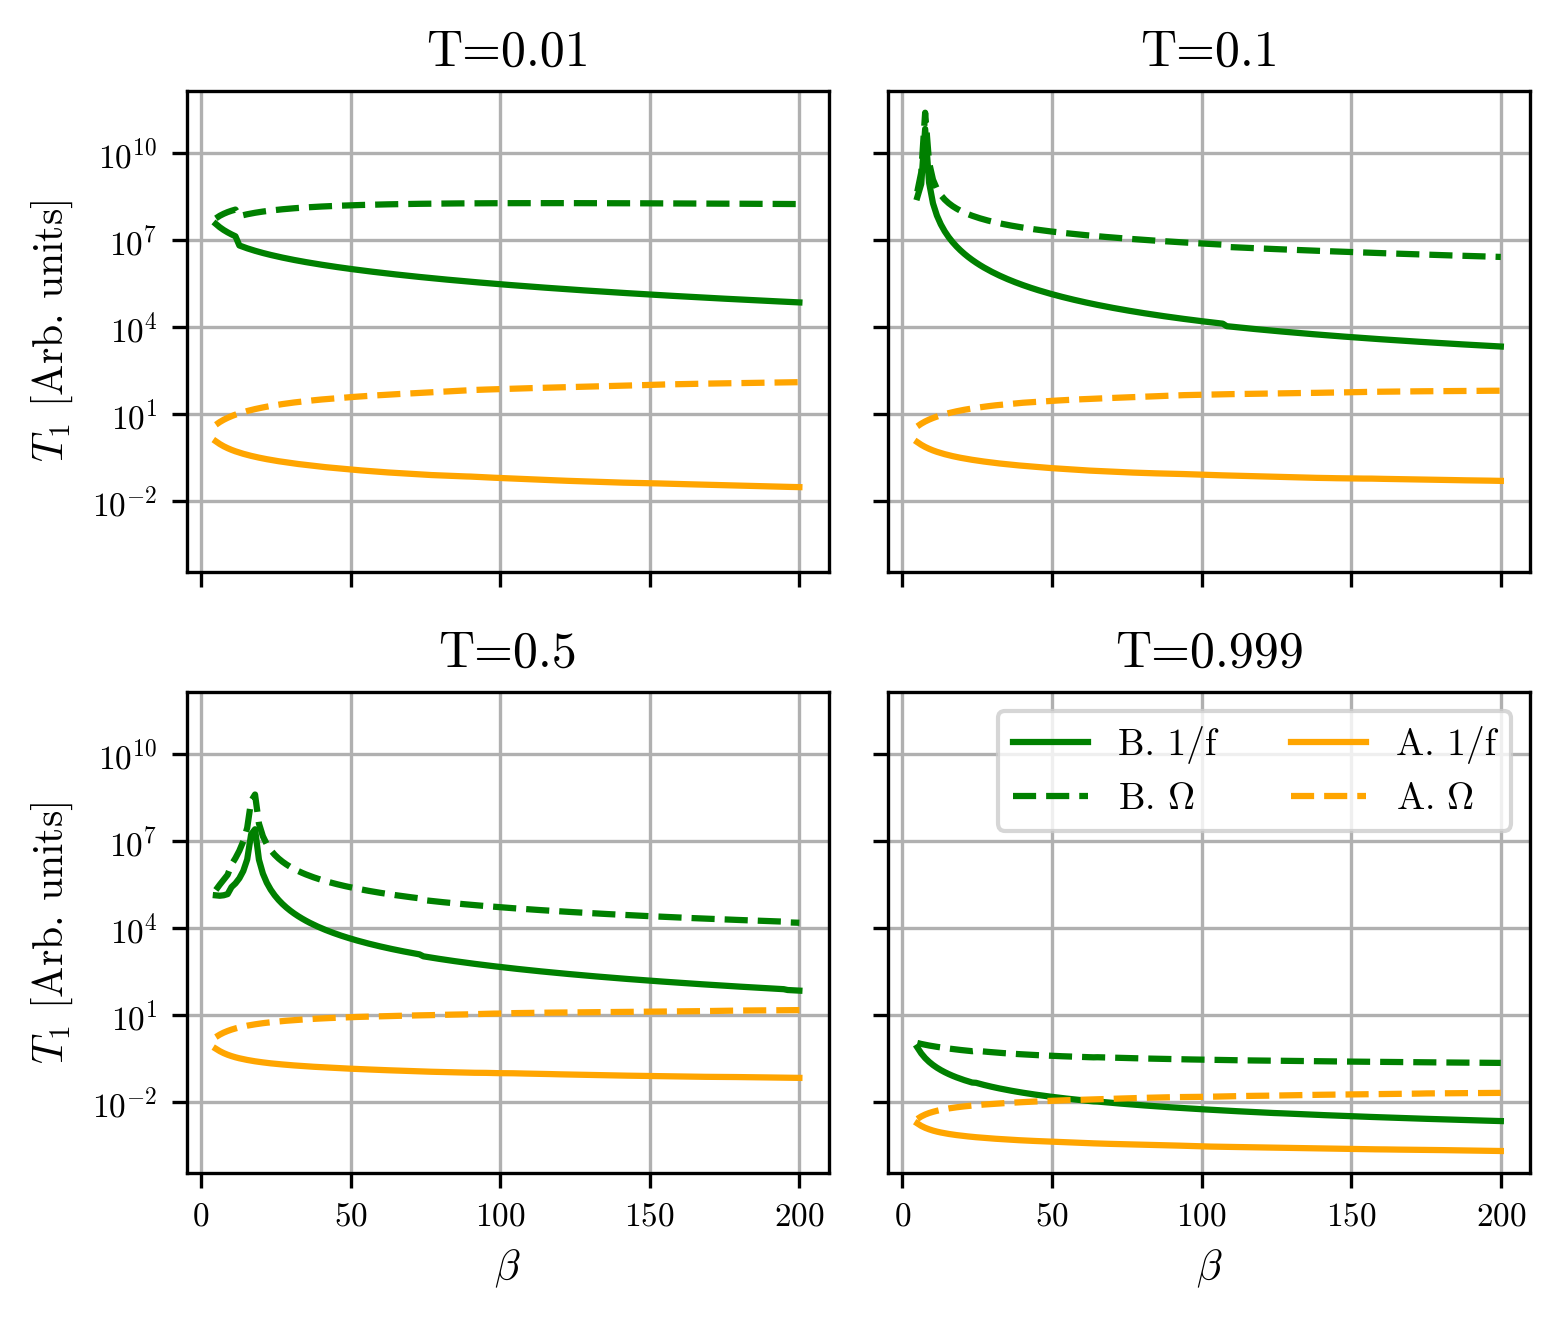

In [189]:
fig_T, ax_T = plt.subplots(2,2, figsize=(5.3, 4.5), sharex=True, sharey=True)

print("The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.")
print("Blue is the transmon, green is Beenakker and orange is Averin")

for m in range(2):
    for n in range(2):

        #The three T1 times for Beenakker model
        ax_T[m, n].plot(beta_arr, energy_result_beenakker_T[n + m*2, :, 0], color = "green", label = "B. 1/f")
        ax_T[m, n].plot(beta_arr, energy_result_beenakker_T[n + m*2, :, 1], "--", color = "green", label = r"B. $\Omega$")

        #The three T1 times for Averin
        ax_T[m, n].plot(beta_arr, energy_result_Averin_T[n + m*2, :, 0], color = "orange", label = "A. 1/f")
        ax_T[m, n].plot(beta_arr, energy_result_Averin_T[n + m*2, :, 1], "--", color = "orange", label = r"A. $\Omega$")


        ax_T[m, n].set(title = r"T="+str(four_T[n + m*2]), yscale = "log")

ax_T[1, 1].legend(ncol=2) 
ax_T[0,0].set(ylabel = r"$T_1$ [Arb. units]")
ax_T[1,1].set(xlabel = r"$\beta$")
ax_T[1,0].set(xlabel = r"$\beta$", ylabel = r"$T_1$ [Arb. units]")

#fig_T.suptitle(r"Plots of the $T_1$ times from $T$ noise with $\Delta=E_J=1$")
fig_T.tight_layout()

In [186]:
T_arr = np.linspace(0.001, 0.999, 100)


T_result_beenaker_T = np.zeros((len(four_beta), len(T_arr), 2))
T_result_Averin_T = np.zeros((len(four_beta), len(T_arr), 2))


BeenakkerPlot.gap = gap
AverinPlot.gap = gap

for i in range(len(four_beta)):
    BeenakkerPlot.EC = gap/four_beta[i]
    AverinPlot.EC = gap/four_beta[i]

    for j in range(len(T_arr)):
        BeenakkerPlot.T = T_arr[j]
        AverinPlot.T = T_arr[j]

        BeenakkerPlot.solve()
        AverinPlot.solve()

        beenakkerGamma =  BeenakkerPlot.T_1_gamma_T()
        averinGamma =  AverinPlot.T_1_gamma_T()

        T_result_beenaker_T[i, j, :] = 1/beenakkerGamma
        T_result_Averin_T[i, j, :] = 1/averinGamma
        

The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.
Blue is the transmon, green is Beenakker and orange is Averin


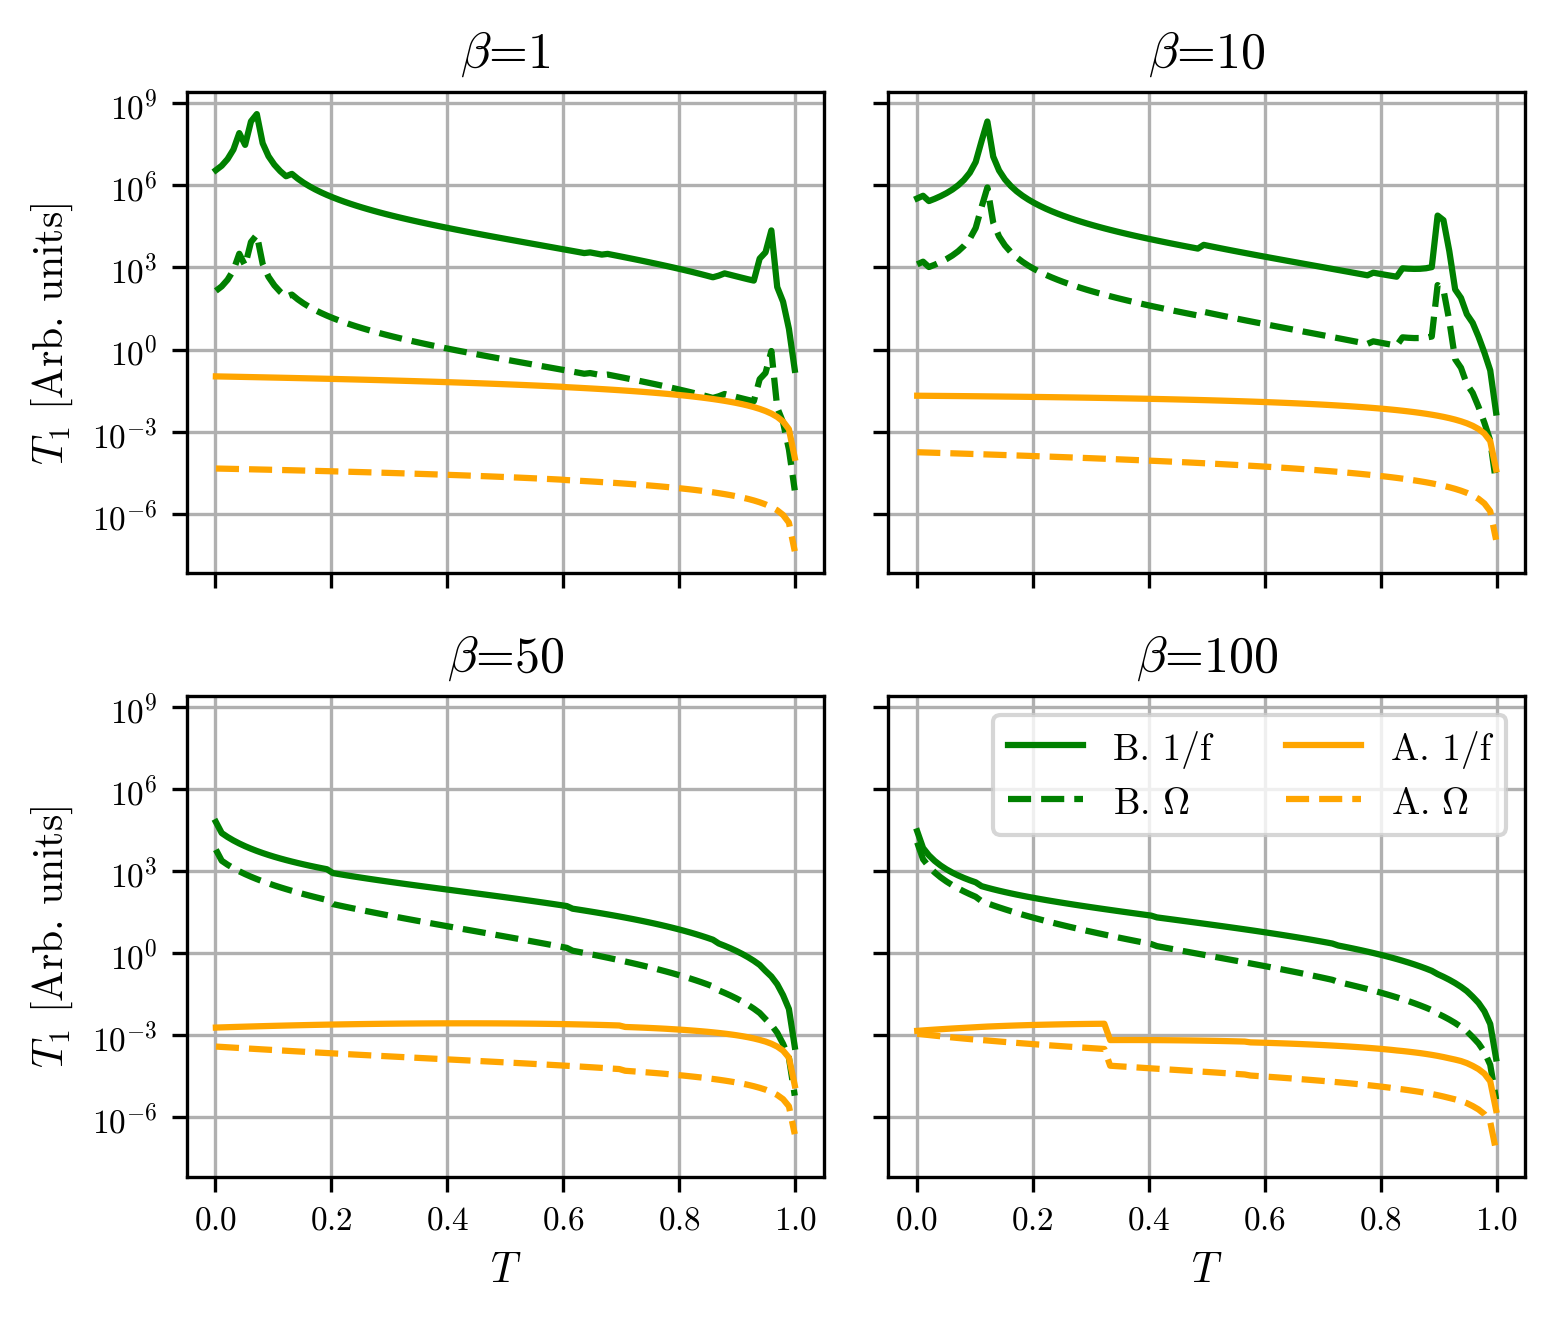

In [187]:
fig_beta, ax_beta = plt.subplots(2,2, figsize=(5.3, 4.5), sharex=True, sharey=True)

print("The solid line is 1/f charge noise, the dashed line is the ohmic charge noise and the dashed/dotted is the dielectric loss.")
print("Blue is the transmon, green is Beenakker and orange is Averin")

for m in range(2):
    for n in range(2):
        #The three T1 times for Beenakker model
        ax_beta[m, n].plot(T_arr, T_result_beenaker_T[n + m*2, :, 0], color = "green", label = "B. 1/f")
        ax_beta[m, n].plot(T_arr, T_result_beenaker_T[n + m*2, :, 1], "--", color = "green", label = r"B. $\Omega$")

        #The three T1 times for Averin
        ax_beta[m, n].plot(T_arr, T_result_Averin_T[n + m*2, :, 0], color = "orange", label = "A. 1/f")
        ax_beta[m, n].plot(T_arr, T_result_Averin_T[n + m*2, :, 1], "--", color = "orange", label = r"A. $\Omega$")


        ax_beta[m, n].set(title = r"$\beta$="+str(four_beta[n + m*2]),  yscale = "log")

ax_beta[1, 1].legend(ncol = 2)
ax_beta[0,0].set(ylabel = r"$T_1$ [Arb. units]")
ax_beta[1,1].set(xlabel = r"$T$")
ax_beta[1,0].set(xlabel = r"$T$", ylabel = r"$T_1$ [Arb. units]")

#fig_beta.suptitle(r"Plots of the $T_1$ times from $T$ noise with $\Delta=E_J=1$")
fig_beta.tight_layout()

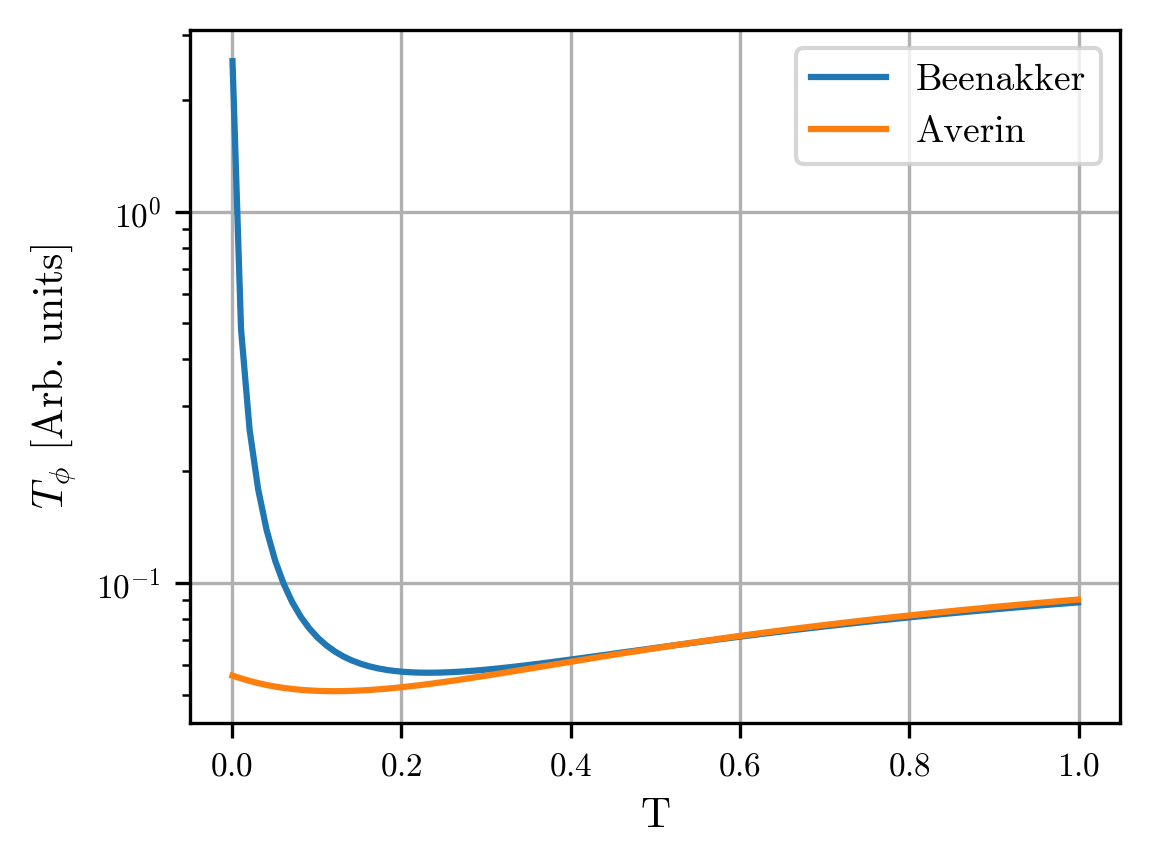

In [191]:
gamma_dephase_beenakker_T = np.zeros_like(T_arr)
gamma_dephase_averin_T = np.zeros_like(T_arr)

BeenakkerPlot.gap = gap
BeenakkerPlot.EC = gap/100
BeenakkerPlot.ng = 0

AverinPlot.gap = gap
AverinPlot.EC = gap/100
AverinPlot.ng = 0

for i in range(len(T_arr)):
    BeenakkerPlot.T = T_arr[i]
    BeenakkerPlot.solve()
    gamma_dephase_beenakker_T[i] = BeenakkerPlot.dephasing_rate_T()

    AverinPlot.T = T_arr[i]
    AverinPlot.solve()
    gamma_dephase_averin_T[i] = AverinPlot.dephasing_rate_T()

plt.plot(T_arr, 1/gamma_dephase_beenakker_T, label = "Beenakker")
plt.plot(T_arr, 1/gamma_dephase_averin_T, label = "Averin")
plt.xlabel("T")
plt.ylabel(r"$T_\phi$ [Arb. units]")
plt.yscale("log")
plt.legend()